In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [12]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#Build the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Alternated method 
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#Train the Model - epochs means the time period, so we are iteratively training this model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300)

# For logistic regression and models after it we will need gradient descent

Epoch 1/300
12/12 [==============================] - 0s 15ms/step - loss: 1.2410 - accuracy: 0.3832 - val_loss: 1.2645 - val_accuracy: 0.4202
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 1.1297 - accuracy: 0.4147 - val_loss: 1.1537 - val_accuracy: 0.4362
Epoch 3/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0239 - accuracy: 0.4541 - val_loss: 1.0531 - val_accuracy: 0.4681
Epoch 4/300
12/12 [==============================] - 0s 5ms/step - loss: 0.9272 - accuracy: 0.4987 - val_loss: 0.9627 - val_accuracy: 0.5106
Epoch 5/300
12/12 [==============================] - 0s 3ms/step - loss: 0.8457 - accuracy: 0.5433 - val_loss: 0.8786 - val_accuracy: 0.5372
Epoch 6/300
12/12 [==============================] - 0s 4ms/step - loss: 0.7689 - accuracy: 0.5879 - val_loss: 0.8050 - val_accuracy: 0.5798
Epoch 7/300
12/12 [==============================] - 0s 5ms/step - loss: 0.7023 - accuracy: 0.6430 - val_loss: 0.7400 - val_accuracy: 0.6117
Epoch 8/300


In [24]:
#Evaluate the Model - evaluate() returns loss and accuracy
print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9895
Train Score:  [0.04646306857466698, 0.9895012974739075]
6/6 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9574
Test Score:  [0.10645312815904617, 0.957446813583374]


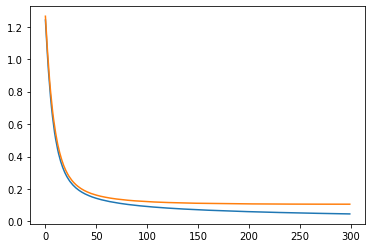

In [25]:
#Plotting the return 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

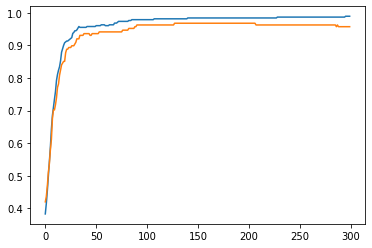

In [26]:
#Plotting accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')

# **Making Predictions**

In [27]:
P = model.predict(X_test)
print(P)

[[9.99986947e-01]
 [9.92380381e-01]
 [9.99934793e-01]
 [9.84113097e-01]
 [9.99955535e-01]
 [5.92346072e-01]
 [9.88997936e-01]
 [6.97145381e-08]
 [3.18287630e-06]
 [9.99802530e-01]
 [9.99873161e-01]
 [9.93644357e-01]
 [9.99837220e-01]
 [2.38865614e-04]
 [9.99604404e-01]
 [9.99977767e-01]
 [9.98980880e-01]
 [1.08590722e-03]
 [9.99986529e-01]
 [4.90149523e-06]
 [3.63638431e-01]
 [5.45481214e-07]
 [9.94925737e-01]
 [2.88672447e-02]
 [6.03079796e-03]
 [9.99972105e-01]
 [2.45826930e-01]
 [9.97859001e-01]
 [9.99223828e-01]
 [9.93623734e-01]
 [9.30260122e-01]
 [4.93127045e-05]
 [9.99987960e-01]
 [9.47052956e-01]
 [9.65895653e-01]
 [3.57325494e-01]
 [9.99920964e-01]
 [9.00211930e-02]
 [3.22118223e-01]
 [9.99450803e-01]
 [9.99976158e-01]
 [1.15824253e-06]
 [9.98024523e-01]
 [9.99997199e-01]
 [8.25232506e-01]
 [1.83641911e-04]
 [9.98083174e-01]
 [9.99995470e-01]
 [9.94994283e-01]
 [2.34765402e-11]
 [5.91529306e-06]
 [9.99991536e-01]
 [9.60177720e-01]
 [6.19110541e-09]
 [9.97136176e-01]
 [9.282282

In [28]:
P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]


In [29]:
print('Manually calculated accuracy: ', np.mean(P == y_test))
print("Evaluate Ooutput: ", model.evaluate(X_test, y_test))

Manually calculated accuracy:  0.9574468085106383
6/6 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9574
Evaluate Ooutput:  [0.10645312815904617, 0.957446813583374]


# **Saving the Model**

In [30]:
model.save('linearclassifier.h5')

In [31]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Sep 26 06:46 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Sep 22 13:42 sample_data


In [32]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9574


[0.10645312815904617, 0.957446813583374]